<h1><center> Lab 3: Statistics and Machine Learning I: Supervised Learning </center></h1>

**Goal:** In this notebook we are going to start applying machine learning methods to train statistical models and explore new methods of inference and prediction. We will focus on Supervised Learning, both regression (learn continuous labels) and classification (learn discrete labels). In particular, we will introduce the Python library Scikit-learn and play with:
- Linear and Polynomial regression
- Naive Bayes

The goals of this notebook are to test the application of Regression and Classification methods to structured and unstructured datasets; to apply model validation methods; and to perform feature engineering on unstructured text. 

The practical aspects of this Lab will be based on the **Chapter 4** (up to section *In Depth: Linear Regression*) of the [*Python Data Science Handbook*](https://jakevdp.github.io/PythonDataScienceHandbook/). To gain a better insight on the theoretical aspects of the algorithms we are going to use, we recommend **Chapters 3**, and **Chapter 4** (Sections 4.1 to 4.4) of the book [*An Introduction to Statistical Learning*](https://www.statlearning.com).

In Part I, once again, we are going to use the Happiness Report 2021 as a data set. Make sure to have *DataPanelWHR2021C2.xls* in the same folder as this Jupyter Notebook. You can find more info about the meaning of each column in the *DataPanelWHR2021C2.xls* dataset [here](https://happiness-report.s3.amazonaws.com/2021/Appendix1WHR2021C2.pdf), page 1-3.

In Part II we are going to apply a classification algorithm to the [Newsgroup](http://qwone.com/~jason/20Newsgroups/) dataset, which is a well-known dataset to study ML applied to unstructured text.

*Note: See the additional file associated with Lab 3 (Lab3-Assignment1-Aux.ipynb) for a notebook that can be helpful to load and pre-process the data required for Group Assignment 1. Next week (week 4) the whole werkcollege will be dedicated to work in the Assignment 1.*

<h1><center> Part I: Linear regression with Scikit-learn </center></h1>

Here we will apply Scikit learn to create a Linear Regression model. Similar to other methods that use Estimator API of Scikit learn library, training and applying Linear Regression is a 5-Step process:

1. Select model (Linear Regression, in this case) and import it
2. Select model hyperparameters
3. Arrange data in feature matrix (or vector if just 1 feature) and Target array
4. Fit model to data
5. Apply model to inference and prediction problems

We will apply Linear Regression to better **understand 1) the relationship between GDP and Life Expectancy and 2) the relationship between Life expectancy and *happiness* in a specific year (2016)**.

First, we will load and vizualize the required data:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load data
happinessdataframe = pd.read_excel('DataPanelWHR2021C2.xls', index_col=[0,1])
happinessdataframe.head()

Life Ladder  Log GDP per capita  Social support  \
Country name year                                                    
Afghanistan  2008     3.723590            7.370100        0.450662   
             2009     4.401778            7.539972        0.552308   
             2010     4.758381            7.646709        0.539075   
             2011     3.831719            7.619532        0.521104   
             2012     3.782938            7.705479        0.520637   

                   Healthy life expectancy at birth  \
Country name year                                     
Afghanistan  2008                         50.799999   
             2009                         51.200001   
             2010                         51.599998   
             2011                         51.919998   
             2012                         52.240002   

                   Freedom to make life choices  Generosity  \
Country name year                                             
Afghanistan  2008                      0.718114    0.167640   
             2009                      0.678896    0.190099   
             2010                      0.600127    0.120590   
             2011                      0.495901    0.162427   
             2012                      0.530935    0.236032   

                   Perceptions of corruption  Positive affect  Negative affect  
Country name year                                                               
Afghanistan  2008                   0.881686         0.517637         0.258195  
             2009                   0.850035         0.583926         0.237092  
             2010                   0.706766         0.618265         0.275324  
             2011                   0.731109         0.611387         0.267175  
             2012                   0.775620         0.710385         0.267919

Below we present some extra examples of how to navigate multi-indexes in Pandas.

Say you'd like to select data for a given country (Algeria) within a specific period (2011-2020)

It seems convinient to first select the rows (which determine country and year) and then columns.

To first select rows we will use .loc to apply array-style indexing.

We then have two options:

**1) use tuples to iterate over the multi-index;**

**2) or perform array-style indexing also within the multi-index (that is, regard the indexing of rows as a typical NumPy array).**

In [2]:
# Option 1
happinessdataframe.loc[("Algeria",2011):("Algeria",2020)]

Life Ladder  Log GDP per capita  Social support  \
Country name year                                                    
Algeria      2011     5.317194            9.296691        0.810234   
             2012     5.604596            9.310611        0.839397   
             2014     6.354898            9.335159        0.818189   
             2016     5.340854            9.362022        0.748588   
             2017     5.248912            9.354488        0.806754   
             2018     5.043086            9.348318        0.798651   
             2019     4.744627            9.336946        0.803259   

                   Healthy life expectancy at birth  \
Country name year                                     
Algeria      2011                         64.660004   
             2012                         64.820000   
             2014                         65.139999   
             2016                         65.500000   
             2017                         65.699997   
             2018                         65.900002   
             2019                         66.099998   

                   Freedom to make life choices  Generosity  \
Country name year                                             
Algeria      2011                      0.529561   -0.180654   
             2012                      0.586663   -0.172123   
             2014                           NaN         NaN   
             2016                           NaN         NaN   
             2017                      0.436670   -0.166782   
             2018                      0.583381   -0.145943   
             2019                      0.385083    0.005087   

                   Perceptions of corruption  Positive affect  Negative affect  
Country name year                                                               
Algeria      2011                   0.637982         0.550203         0.254897  
             2012                   0.690116         0.604023         0.229716  
             2014                        NaN         0.625905         0.176866  
             2016                        NaN         0.660510         0.377112  
             2017                   0.699774         0.641980         0.288710  
             2018                   0.758704         0.591043         0.292946  
             2019                   0.740609         0.584944         0.215198

In [3]:
# Option 1 and select specific columns
happinessdataframe.loc[("Algeria",2011):("Algeria",2020), ["Life Ladder", "Generosity"]]

Life Ladder  Generosity
Country name year                         
Algeria      2011     5.317194   -0.180654
             2012     5.604596   -0.172123
             2014     6.354898         NaN
             2016     5.340854         NaN
             2017     5.248912   -0.166782
             2018     5.043086   -0.145943
             2019     4.744627    0.005087

In [4]:
# Option 2

# Note that we must select the axis where we would like to perform array-style indexing (axis=0 selects rows)
happinessdataframe.loc(axis=0)["Algeria", 2011:2020]

Life Ladder  Log GDP per capita  Social support  \
Country name year                                                    
Algeria      2011     5.317194            9.296691        0.810234   
             2012     5.604596            9.310611        0.839397   
             2014     6.354898            9.335159        0.818189   
             2016     5.340854            9.362022        0.748588   
             2017     5.248912            9.354488        0.806754   
             2018     5.043086            9.348318        0.798651   
             2019     4.744627            9.336946        0.803259   

                   Healthy life expectancy at birth  \
Country name year                                     
Algeria      2011                         64.660004   
             2012                         64.820000   
             2014                         65.139999   
             2016                         65.500000   
             2017                         65.699997   
             2018                         65.900002   
             2019                         66.099998   

                   Freedom to make life choices  Generosity  \
Country name year                                             
Algeria      2011                      0.529561   -0.180654   
             2012                      0.586663   -0.172123   
             2014                           NaN         NaN   
             2016                           NaN         NaN   
             2017                      0.436670   -0.166782   
             2018                      0.583381   -0.145943   
             2019                      0.385083    0.005087   

                   Perceptions of corruption  Positive affect  Negative affect  
Country name year                                                               
Algeria      2011                   0.637982         0.550203         0.254897  
             2012                   0.690116         0.604023         0.229716  
             2014                        NaN         0.625905         0.176866  
             2016                        NaN         0.660510         0.377112  
             2017                   0.699774         0.641980         0.288710  
             2018                   0.758704         0.591043         0.292946  
             2019                   0.740609         0.584944         0.215198

In [5]:
# Option 2 and select specific columns
happinessdataframe.loc(axis=0)["Algeria", 2011:2020][["Life Ladder", "Generosity"]]

Life Ladder  Generosity
Country name year                         
Algeria      2011     5.317194   -0.180654
             2012     5.604596   -0.172123
             2014     6.354898         NaN
             2016     5.340854         NaN
             2017     5.248912   -0.166782
             2018     5.043086   -0.145943
             2019     4.744627    0.005087

And now we are ready to visualize GDP and life expectancy data (GDP as feature vector, life expectancy as target vector), using the previous syntax. 

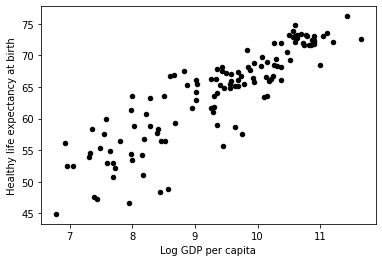

In [6]:
x = happinessdataframe.dropna().loc(axis=0)[:,2016][["Log GDP per capita","Healthy life expectancy at birth"]]
x.plot.scatter(x="Log GDP per capita", y="Healthy life expectancy at birth",c='black')
plt.show()

**Q: Note that .dropna() is being used to drop rows with NaN values. What are the possible problems of using dropna() in that context? Are we missing any important information? How could we solve the problem differently?**

In [7]:
# Solution:

# we are losing information on columns that might be complete
# maybe there are important reasons for the data not to be available
# we could substitute NaN for mean values (e.g., same country in previous years or mean values for countries in the same region)

<h3> Single Variable Linear regression </h3>

Below you have an example of ordinary least squares Linear Regression (again, please read Chapter 3.1 of the book [ISLR](https://www.statlearning.com) and chapter [In Depth: Linear Regression](https://jakevdp.github.io/PythonDataScienceHandbook/05.06-linear-regression.html) of the book PDSH)

LinearRegression fits a linear model with coefficients $\vec{w} = (w_0, w_1,..., w_p)$ to minimize the residual sum of squares between the observed targets in the dataset, and the targets predicted by the linear approximation.

When $p=1$ (that is, a feature space with 1 dimension), LinearRegression fits a straight line to the data. Such line (as any other straight line) can be defined by two parameters: intercept ($w_0$) and slope ($w_1$).

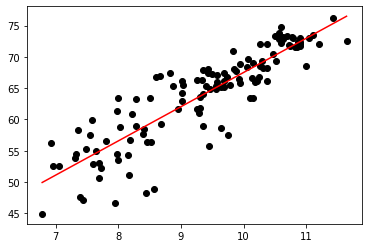

In [9]:
# 5 Steps to use the Scikit-learn Estimator API:

# 1. Select model and import it
from sklearn.linear_model import LinearRegression

# 2. Select model hyperparameters
model = LinearRegression(fit_intercept=True) # select model hyperparameters

# 3. Arrange data in feature matrix (or vector if just 1 feature) and Target array
X = x["Log GDP per capita"].values
Y = x["Healthy life expectancy at birth"].values

# 4. Fit model to data
model.fit(X[:, np.newaxis], Y)

# 5. Apply model
xfit = np.linspace(6, 12, 2) # these values (6 and 12) were chosen by inspecting, visually, the datapoints in the plot
xfit = np.linspace(min(X), max(X), 2) # suggestion of alternative

yfit = model.predict(xfit[:, np.newaxis])

# Plot
plt.scatter(X, Y, c='black')
plt.plot(xfit, yfit, c='red');

**Q1: What is the slope (or coefficient) and intercept of the model created? What is the slope telling us about the relationship between GDP and life expectancy?**

Expected output: 5.47273829 and 12.791068455823464 (but please show how to reach these values)

In [9]:
# Solution Q1
print("Slope:", model.coef_)
print("Intercept:", model.intercept_)

print("For an increase of 1 unit of (log) GDP there is an average increase in " +str(int(model.coef_))+ " years of life expectancy.")

Slope: [5.47273829]
Intercept: 12.791068455823442
For an increase of 1 unit of (log) GDP there is an average increase in 5 years of life expectancy.


**Q2: Can you write down an expression for the straight red line in the previous plot, using the values of intercept_ and coef_ that were just printed? To confirm your solution, do a plot where you overlap the red plot in the figure below (red) with another plot with the straight line equation you derived.**

Expected output: two lines (e.g., red and blue) perfectly overlaped. To ease visualization, increase the thickness of the line in the back. 

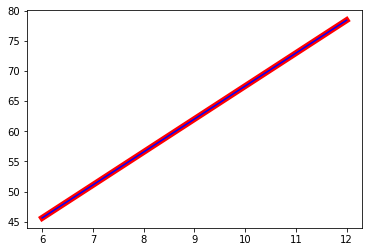

In [10]:
# Solution Q2
yy = model.intercept_ + model.coef_[0] * xfit
fig, ax = plt.subplots()
ax.plot(xfit, yfit, c='red', linewidth=6);
ax.plot(xfit, yy, c='blue');
plt.show()

<h3> Single Variable Polynomial regression </h3>

Linear regression can also be applied after expanding the feature space to include non-linear terms. This is convinient to capture non-linear relationships in data; notice that the number of coefficients also increase. Check Chapter 3.3.2 of ISLR for extra insights.

Let us now inspect the relationship between Life expectancy and Happiness. First we plot the data:

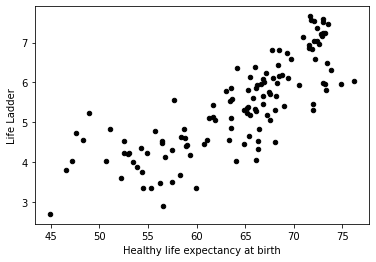

In [11]:
x = happinessdataframe.dropna().loc(axis=0)[:,2016][["Healthy life expectancy at birth","Life Ladder"]]
x.plot.scatter(x="Healthy life expectancy at birth", y="Life Ladder",c='black')
plt.show()

Note that now the relationship between the predictor and response of interest doesn't appear to be linear. 

We now intend to expand the feature space to include higher order terms using, as basis function, a polynomial function of degree 2.

You can notice, below, a pipeline. To gain some insight on what is the meaning of a pipeline, please check the PDSH book, [here](https://jakevdp.github.io/PythonDataScienceHandbook/05.04-feature-engineering.html)

**Q: Can you fill the missing lines below to fit the model to data and apply the model?**

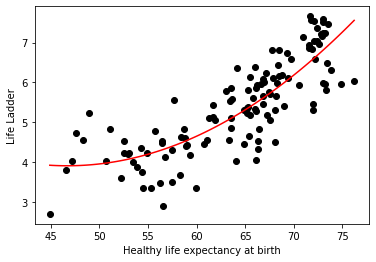

In [13]:
# 1. Select model and import it
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

# 2. Select model hyperparameters (here, we will use a polynomial, degree 2, basis function)
polymodel = make_pipeline(PolynomialFeatures(2), LinearRegression(fit_intercept=True))

# 3. Arrange data in feature matrix (or vector if just 1 feature) and Target array
x = happinessdataframe.dropna().loc(axis=0)[:,2016][["Healthy life expectancy at birth","Life Ladder"]]

X = x["Healthy life expectancy at birth"].values
Y = x["Life Ladder"].values

# 4. Fit model to data
## MISSING LINE, PLEASE COMPLETE #Solution: polymodel.fit(X[:, np.newaxis], Y)
polymodel.fit(X[:, np.newaxis], Y)

# 5. Apply model
## MISSING LINE, PLEASE COMPLETE Solution: #xfit = np.linspace(min(X), max(X), 100)
## MISSING LINE, PLEASE COMPLETE Solution: #yfit = polymodel.predict(xfit[:, np.newaxis])
xfit = np.linspace(min(X), max(X), 100)
yfit = polymodel.predict(xfit[:, np.newaxis])

# Plot
fig, ax = plt.subplots()
ax.scatter(X, Y, c='black')
ax.set_xlabel("Healthy life expectancy at birth")
ax.set_ylabel("Life Ladder")
ax.plot(xfit, yfit, c='red');
plt.show()

<h3> Evaluate the model </h3>

Should we use Linear or Polynomial regression to model the relationship between Life expectancy and Happiness? 

Let us use historic data (2016) and try to predict Happiness (Life Ladder) in 2017 using a Linear or Polynomial regression to model. To quantify which model predicts better the relationship between Life expectancy and Happiness in 2017 we will compute the mean square error (MSE) and the coefficient of determination (R2) score between the real data in 2017 and our prediction.

Notice that now we are considering explicitelly a training (2016 data) and testing set (2017 data).

In [15]:
# Calculate MSE and R2

from sklearn.metrics import mean_squared_error, r2_score

# Split the data into training/testing sets

# 2016 will be our train and validation set
x = happinessdataframe.dropna().loc(axis=0)[:,2016][["Healthy life expectancy at birth", "Life Ladder"]]

trainSetSize = int(x["Healthy life expectancy at birth"].values.size * 0.7)

Xtrain = x["Healthy life expectancy at birth"].values[:trainSetSize]
Ytrain = x["Life Ladder"].values[:trainSetSize]

Xvalidate = x["Healthy life expectancy at birth"].values[trainSetSize:]
Yvalidate = x["Life Ladder"].values[trainSetSize:]

polymodel = make_pipeline(PolynomialFeatures(1), LinearRegression(fit_intercept=True))
polymodel.fit(Xtrain[:, np.newaxis], Ytrain)

# 2017 will be our test set
x = happinessdataframe.dropna().loc(axis=0)[:,2017][["Healthy life expectancy at birth","Life Ladder"]]

Xtest = x["Healthy life expectancy at birth"].values
Ytest = x["Life Ladder"].values

YPredictionValidate = polymodel.predict(Xvalidate[:, np.newaxis])
YPredictionTest = polymodel.predict(Xtest[:, np.newaxis])

# The mean squared error
print("Mean squared error - Validation: %.2f" % mean_squared_error(Yvalidate, YPredictionValidate))
# Explained variance score: 1 is perfect prediction
print('Variance score - Validation: %.2f' % r2_score(Yvalidate, YPredictionValidate))

# The mean squared error
print("Mean squared error - Test: %.2f" % mean_squared_error(Ytest, YPredictionTest))
# Explained variance score: 1 is perfect prediction
print('Variance score - Test: %.2f' % r2_score(Ytest, YPredictionTest))

Mean squared error - Validation: 0.57
Variance score - Validation: 0.53
Mean squared error - Test: 0.52
Variance score - Test: 0.59


**Q3: The previous evaluation metrics refer to a Linear regression (note the *PolynomialFeatures(1)*). What are the mean squared error and coefficient of determination (R2) if we apply a polynomial regression of degree 2? Does that mean that we should opt for a linear or polynomial regression, to model the relationship between Life expectancy and Happiness?**

Expected output: MSE and R2 (aka coefficient of determination or variance score) associated with the polynomial regression with degree 2.

In [ ]:
# Solution Q3

x = happinessdataframe.dropna().loc(axis=0)[:,2016][["Healthy life expectancy at birth", "Life Ladder"]]

Xtrain = x["Healthy life expectancy at birth"].values
Ytrain = x["Life Ladder"].values

polymodel = make_pipeline(PolynomialFeatures(2), LinearRegression(fit_intercept=True))
polymodel.fit(Xtrain[:, np.newaxis], Ytrain)

x = happinessdataframe.dropna().loc(axis=0)[:,2017][["Healthy life expectancy at birth","Life Ladder"]]

Xtest = x["Healthy life expectancy at birth"].values
Ytest = x["Life Ladder"].values

Yprediction = polymodel.predict(Xtest[:, np.newaxis])

print("Mean squared error: %.2f" % mean_squared_error(Ytest, Yprediction))
print('Variance score: %.2f' % r2_score(Ytest, Yprediction))

Mean squared error: 0.47
Variance score: 0.63


**Q4: 1) Create a regression model to capture the relationship between 'Freedom to make life choices' and 'Perception of corruption' in 2017. 2) Do a scatter plot with the corresponding data and regression line. Which order of polynomial basis better capture the relationship between Freedom to make life choices and Perception of corruption in 2017?**

Expected output: You can check visually which order better captures the relationship in data (try order 1 to, say, 5); alternativelly, calculate the MSE and R2 associated with each order.

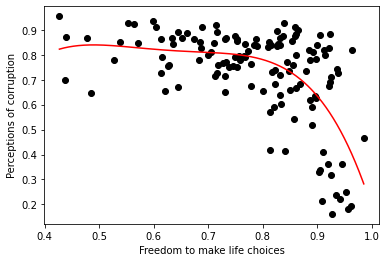

In [ ]:
# Solution Q4

# 1. Select model and import it
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

# 2. Select model hyperparameters (here, we will use a polynomial, degree 2, basis function)
polymodel = make_pipeline(PolynomialFeatures(), LinearRegression())

# 3. Arrange data in feature matrix (or vector if just 1 feature) and Target array

x = happinessdataframe.dropna().loc(axis=0)[:, 2017][["Freedom to make life choices","Perceptions of corruption"]]
x.plot.scatter(x="Freedom to make life choices", y="Perceptions of corruption",c='black')

X = x["Freedom to make life choices"].values
Y = x["Perceptions of corruption"].values

polymodel.fit(X[:, np.newaxis], Y)

# 5. Apply model
xfit = np.linspace(min(X), max(X), 1000)
yfit = polymodel.predict(xfit[:, np.newaxis])

# Plot
plt.scatter(X, Y, c='black')
plt.plot(xfit, yfit, c='red');

It is time-consuming to test all (hyper)parameters by hand.

Fortunatelly, Scikit-learn offers the option to do a grid search over many parameters and select the best one:

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {'polynomialfeatures__degree': np.arange(21),
              'linearregression__fit_intercept': [True, False],
              'linearregression__normalize': [True, False]}

model = make_pipeline(PolynomialFeatures(), LinearRegression())
# in the original notebook we had PolynomialFeatures(4) -> the parameter 4 is ignored in the grid search

grid = GridSearchCV(model, param_grid, cv=7)

grid.fit(Xtrain[:, np.newaxis], Ytrain);

grid.best_params_

{'linearregression__fit_intercept': True,
 'linearregression__normalize': True,
 'polynomialfeatures__degree': 8}

**Q5: Can you understand how GridSearchCV operates and the meaning of its output?**

Expected outcome: Two sentences explaining or point to relevant documentation. Understand your answer.

In [ ]:
# Solution Q5: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

Using GridSearchCV also highlights the need to have a *train*, *validate* and *test* set. 

Note that when applying GridSearchCV we are using a parameter cv=7. That parameter determines the cross-validation splitting strategy. That means that we are sussessivelly dividing our data in a train and validation set, in order to train the model and evaluate the performance of a specific combination of parameters. The final valitation for the model, however, must be performed a test set — that is, a test that was never using during the training or validation.

<h1><center> Part II: Classification (Naive Bayes) with Scikit-learn </center></h1>

Previously we applied Regression methods given a structured dataset. We will now apply classification methods to an unstructured (text) dataset. Notice that instead of having continuous targets we will have discrete categorical targets. 

We will use as example the (quite famous) [Newsgroup](http://qwone.com/~jason/20Newsgroups/) dataset. The [20 Newsgroups collection](http://qwone.com/~jason/20Newsgroups/) has become a popular data set for experiments in text applications of machine learning techniques, such as text classification and text clustering. This example will be based on the [Scikit documentation](https://scikit-learn.org/stable/tutorial/text_analytics/working_with_text_data.html). 

The main goals of the following section are to have you experiment your skills with unstructured data (text), play with feature engineering in text and apply a classifcation algorithm (Naive Bayes). 

**The examples and exercises will be important to also gain insights on how to work with the data in the Assignment 1.**

In [11]:
# import newsgroup dataset from sklearn datasets
from sklearn.datasets import fetch_20newsgroups

# select the categories of interest
categories = ['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']

# sample a training set
twenty_train = fetch_20newsgroups(subset='train', categories=categories, shuffle=True, random_state=42)

In [12]:
# twenty_train.data stores the text of each post; as an example, check the example in position [3]
twenty_train.data[3].split('\n')

['From: s0612596@let.rug.nl (M.M. Zwart)',
 'Subject: catholic church poland',
 'Organization: Faculteit der Letteren, Rijksuniversiteit Groningen, NL',
 'Lines: 10',
 '',
 'Hello,',
 '',
 "I'm writing a paper on the role of the catholic church in Poland after 1989. ",
 'Can anyone tell me more about this, or fill me in on recent books/articles(',
 'in english, german or french). Most important for me is the role of the ',
 'church concerning the abortion-law, religious education at schools,',
 'birth-control and the relation church-state(government). Thanx,',
 '',
 '                                                 Masja,',
 '"M.M.Zwart"<s0612596@let.rug.nl>',
 '']

In [13]:
# twenty_train.target stores the class of each post; note that for efficiency reasons (e.g., compare int or string) 
# classes are stored as integer
twenty_train.target

array([1, 1, 3, ..., 2, 2, 2])

In [14]:
# we can check the target name; clearly the previous post belongs to category religion
twenty_train.target_names[twenty_train.target[3]]

'soc.religion.christian'

<h3>Feature Engineering</h3>

To create a feature vector from unstructured text, we will encode *text* as *numbers* by performing simple word counting. We will assign each word to a numerical *id* and count the occurrence of each word. We can easily perform such task by using the *CountVectorizer* class included in Scikit learn:

In [15]:
# Feature Engineering:
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(twenty_train.data)
X_train_counts

<2257x35788 sparse matrix of type '<class 'numpy.int64'>'
	with 365886 stored elements in Compressed Sparse Row format>

**Q6: The result above is a sparse matrix: why is it efficient to represent the number of times each word appears as a sparse matrix? (Sparse matrix: matrix which contains very few non-zero elements)**

Expected outcome: Two sentences explaining or point to relevant documentation. Understand your answer.

In [16]:
# Solution Q6
# Simply because each word will only occur in a very small set of examples. 
# As a result, for each word, we will have a lot of 0. 
# Not efficient to have to 0 explicitelly in memory -> the type sparse matrix stores that matrix more efficiently

In [17]:
# let us check the contents of the word matrix:
import pandas as pd
pd.DataFrame(X_train_counts.toarray(), columns=count_vect.get_feature_names())

,00,000,0000,0000001200,000005102000,0001,000100255pixel,00014,000406,0007,...,zvi,zvonko,zwart,zyeh,zyklon,zyxel,zz,zzz,ªl,íålittin
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2252,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2253,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2254,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2255,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [18]:
# we now apply the (Multinomial) Naive Bayes; 

# Remember the 5 steps we need to apply...

# 1. Select model and import it
from sklearn.naive_bayes import MultinomialNB

# 2. Select model hyperparameters; alpha is a smoothing parameter
model = MultinomialNB(alpha=10)

# 3. Arrange data in feature matrix / perform feature engineering
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(twenty_train.data)
Y = twenty_train.target

# 4. Fit model to data
clf = model.fit(X_train_counts, Y)

# 5. Apply model to new examples
docs_new = ['God is love', 'OpenGL on the GPU is fast','Help with printer','My knee hurts']

X_new_counts = count_vect.transform(docs_new)

predicted = clf.predict(X_new_counts)

for doc, category in zip(docs_new, predicted):
    print('%r => %s' % (doc, twenty_train.target_names[category]))

'God is love' => soc.religion.christian
'OpenGL on the GPU is fast' => comp.graphics
'Help with printer' => comp.graphics
'My knee hurts' => sci.med


<h3>Model validation</h3>

We created a model trained on previous examples of text and categories and applied it to new example. 

In general, how *good* is our model? Here we will validate the model we created and understand how to tune it to perform better.

We will use the **TfidfTransformer**: this will transform a count matrix to a normalized tf or tf-idf representation; *Tf* means term-frequency while *tf-idf* means term-frequency times inverse document-frequency. This is a common term weighting scheme in information retrieval, that has also found good use in document classification. The goal of using tf-idf instead of the raw frequencies of occurrence of a token in a given document (as in the previous example) is to scale down the impact of tokens that occur very frequently in a given corpus and that are hence empirically less informative than features that occur in a small fraction of the training corpus. If needed, more info [here](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfTransformer.html). 

In [19]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer

text_clf = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf', MultinomialNB(alpha=1))])

text_clf.fit(twenty_train.data, twenty_train.target)

# create a test set -> this is a set different than the train set
twenty_test = fetch_20newsgroups(subset='test', categories=categories, shuffle=True, random_state=42)
docs_test = twenty_test.data
predicted = text_clf.predict(docs_test)

#in out many examples if our model guessing the right post category?
np.mean(predicted == twenty_test.target)

0.8348868175765646

In the example above we are computing model accuracy, as the fraction of correctly predicted text classes.

In general, we can distinguish between the number of examples belonging to each class that that are correctly or incorrectly classified; this leads to the so-called *confusion matrix* (see section 4.4.3 of ISLR or chapter [Introducing Scikit-learn](https://jakevdp.github.io/PythonDataScienceHandbook/05.02-introducing-scikit-learn.html) of PDSH):

[[192   2   6 119]
 [  2 347   4  36]
 [  2  11 322  61]
 [  2   2   1 393]]


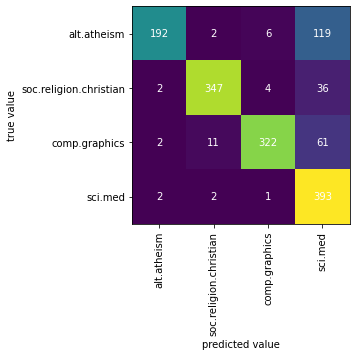

In [20]:
from sklearn.metrics import confusion_matrix

mat = confusion_matrix(twenty_test.target, predicted)

print(mat)

fig, ax = plt.subplots()
ax.imshow(mat, cmap='viridis', interpolation='nearest')
ax.set_xlabel('predicted value')
ax.set_ylabel('true value');
ax.set_xticks([0,1,2,3])
ax.set_yticks([0,1,2,3])
ax.set_xticklabels(categories, rotation='vertical')
ax.set_yticklabels(categories)

# Loop over data to create text annotations.
for i in range(len(mat)):
    for j in range(len(mat)):
        text = ax.text(j, i, mat[i, j],
                       ha="center", va="center", color="w")
plt.show()

**Q6.1: How many times are texts classified as med? (Positives - P)**

**Q6.2: How many times are texts not classified as med? (Negatives - N)**

**Q6.3: How many times are texts belonging to category med correctly classified? (True Positives - TP)**

**Q6.4: How many times are texts belonging to category med wrongly classified? (False Negative - FN)**

**Q6.5: How many times are texts not belonging to category med correctly classified as not being med? (True Negatives - TN)**

**Q6.6: What is the sensitivity of this model associated with class med? (Sensitivity = TP/P)** 

**Q6.7: What is the specificity of this model associated with class christian? (Specificity = TN/N)**

Expected output: one numerical value for each question.

In [24]:
# Solution Q6
p = np.sum(mat[:,3])
n = np.sum(mat[:,0:3])
tp = mat[3,3]
fn = np.sum(mat[3,0:3])
tn = n - fn
fp = np.sum(mat[0:3,3])

sens = tp/(tp+fn)
spec = tn/(tn+fp)

print("Positives:", p)
print("Negatives:", n)
print("True Positives", tp)
print("False Negatives",fn)

print("Sensitivity, Recall", tp/(tp+fn))
print("Precision", tp/(tp+fp))
print("F1 Score", 2*tp/(2*tp+fp+fn))

# alternative to check some metrics:

from sklearn.metrics import classification_report

print(classification_report(twenty_test.target, predicted, target_names=categories))

Positives: 609
Negatives: 893
True Positives 393
False Negatives 5
Sensitivity, Recall 0.9874371859296482
Precision 0.645320197044335
F1 Score 0.7805362462760675
                        precision    recall  f1-score   support

           alt.atheism       0.97      0.60      0.74       319
soc.religion.christian       0.96      0.89      0.92       389
         comp.graphics       0.97      0.81      0.88       396
               sci.med       0.65      0.99      0.78       398

              accuracy                           0.83      1502
             macro avg       0.89      0.82      0.83      1502
          weighted avg       0.88      0.83      0.84      1502



**Q7: Which parameters would maximize the accuracy of our model? Remember GridSearchCV introduced above**

Expected outcome: 3 values, one for each of the following parameters:

- vect__ngram_range

- clf__alpha

- tfidf__use_idf

Please check the documentation of [MultinomialNB](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html) to get familiar with each of those parameters.

In [25]:
# Solution Q7
# which parameters would maximize the accuracy of our model?
from sklearn.model_selection import GridSearchCV
parameters = {
    'vect__ngram_range': [(1, 1), (1, 2), (1, 3)],
    'clf__alpha': (1, 1e-1, 1e-2, 1e-3),
    'tfidf__use_idf': (True, False)
}

gs_clf = GridSearchCV(text_clf, parameters, cv=5) #cv -> cross validation
gs_clf = gs_clf.fit(twenty_train.data[:400], twenty_train.target[:400])

In [26]:
for param_name in sorted(parameters.keys()):
    print("%s: %r" % (param_name, gs_clf.best_params_[param_name]))

clf__alpha: 0.01
tfidf__use_idf: True
vect__ngram_range: (1, 2)


In [27]:
gs_clf.best_score_

0.9349999999999999

**Q8: Re-apply the best model to the examples above (docs_new); Create 4 more examples (related with categories 'alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med') and test the best model found in the GridSearch. Feel try to play with other examples of text you find fun.**

In [28]:
# Solution Q8 Apply model to new examples
docs_new = ['One needs faith', 'OpenGL on the GPU is fast','Help with printer','My knee hurts']

predicted = gs_clf.predict(docs_new)

for doc, category in zip(docs_new, predicted):
    print('%r => %s' % (doc, twenty_train.target_names[category]))

'One needs faith' => soc.religion.christian
'OpenGL on the GPU is fast' => comp.graphics
'Help with printer' => comp.graphics
'My knee hurts' => sci.med


In [29]:
# Q8: Text other examples
# just try with a different docs_new...

docs_new = ['Where can I have a prescription for headaches?']

predicted = gs_clf.predict(docs_new)

for doc, category in zip(docs_new, predicted):
    print('%r => %s' % (doc, twenty_train.target_names[category]))

'Where can I have a prescription for headaches?' => sci.med
